[Table of Contents](./table_of_contents.ipynb)

# Multivariate Gaussians
# 多元高斯分布

Modeling Uncertainty in Multiple Dimensions

多维度建模的不确定性

In [1]:
from __future__ import division, print_function
%matplotlib inline

In [3]:
#format the book
import book_format
book_format.set_style()

## Introduction
## 导论

The techniques in the last chapter are very powerful, but they only work with one variable or dimension. They provide no way to represent multidimensional data, such as the position and velocity of a dog in a field. Position and velocity are related to each other, and as we learned in the g-h chapter we should never throw away information. In this chapter we learn how to describe this relationship probabilistically. Through this key insight we will achieve markedly better filter performance.

上一章中的技术非常强大，但它们只适用于一个变量或维度。它们无法表示多维数据，例如狗在走廊中的位置和速度。位置和速度是相互关联的，正如我们在g-h滤波器一章中所学到的，我们永远不应该丢弃信息。在本章中，我们将学习如何用概率描述这种关系。通过学习这一关键属性，我们将获得明显更好的滤波性能。

## Multivariate Normal Distributions
## 多元正态分布

We've been using Gaussians for a scalar random variable, expressed as $\mathcal{N}(\mu, \sigma^2)$. A more formal term for this is *univariate normal*, where univariate means 'one variable'. The probability distribution of the Gaussian is known as the *univariate normal distribution*.

我们一直使用$\mathcal{N}(\mu, \sigma^2)$记做随机变量的高斯分布作为。 一个更正式的术语是*单变量正态（univariate normal）*，其中单变量的意思是“一个变量”。 高斯的概率分布称为*单变量正态分布（univariate normal distribution）*。

What might a *multivariate normal distribution* be? *Multivariate* means multiple variables. Our goal is to be able to represent a normal distribution with multiple dimensions. I don't necessarily mean spatial dimensions - if we track the position, velocity, and acceleration of an aircraft in (x, y, z) that gives us a nine dimensional problem. Consider a two dimensional case. It might be the *x* and *y* coordinates of a robot, it might be the position and velocity of a dog on the x-axis, or milk production and feed rate at a dairy. It doesn't really matter. We can see that for $N$ dimensions, we need $N$ means, which we will arrange in a column matrix (vector) like so:

*多元正态分布（multivariate normal distribution）*是什么样的呢？ *多变量（Multivariate）*表示多个变量。 我们的目标是能够表示具有多个维度的正态分布。 我指的不一定是空间维度——如果我们跟踪坐标系（x，y，z）中飞机的位置，速度和加速度，这会是一个九维的问题。 考虑二维情况，它可能是机器人的*x*和*y*坐标，它可能是狗在x轴上的位置和速度，或者是奶制品的产奶量和进料速率。这并不重要。我们可以看到，对于$ N $个维度，我们需要$ N $个均值，我们将在列矩阵（向量）中排列，如下所示：

$$
\mu = \begin{bmatrix}\mu_1\\\mu_2\\ \vdots \\\mu_n\end{bmatrix}
$$

Let's say we believe that $x = 2$ and $y = 17$. We would have

假设我们认为$ x = 2 $和$ y = 17 $。 我们会得到

$$
\mu = \begin{bmatrix}2\\17\end{bmatrix} 
$$

The next step is representing our variances. At first blush we might think we would also need N variances for N dimensions. We might want to say the variance for x is 10 and the variance for y is 4, like so. 

下一步是表示我们的方差。乍一看，我们可能会认为N维也需要N个方差。 我们可能认为x的方差是10，y的方差是4，就像这样。

$$\sigma^2 = \begin{bmatrix}10\\4\end{bmatrix}$$ 

This is incomplete because it does not consider the more general case. In the **Gaussians** chapter we computed the variance in the heights of students. That is a measure of how the heights vary relative to each other. If all students are the same height, then the variance is 0, and if their heights are wildly different, then the variance will be large.

这是不完整的，因为它没有考虑更一般的情况。 在**高斯分布**一章中，我们计算了学生身高的方差。它衡量了高度相对于彼此的变化。如果所有学生的身高相同，则方差为0，如果他们的身高差别很大，则方差会很大。

There is also a relationship between height and weight. In general, a taller person weighs more than a shorter person.  Height and weight are *correlated*. We want a way to express not only what we think the variance is in the height and the weight, but also the degree to which they are correlated. In other words, we want to know how weight varies compared to the heights. We call that the *covariance*. 

身高和体重之间也存在关系。 一般来说，身材较高的人会比较矮的人重。 高度和体重是*相关的（correlated）*。我们需要一种方式不仅能表示我们认为在高度和重量的方差，也能表示它们的相关程度。换句话说，我们想知道体重与高度之间的差异。 我们称之为*协方差（covariance）*。

Before we can understand multivariate normal distributions we need to understand the mathematics behind correlations and covariances.

在我们学习多元正态分布之前，我们需要理解相关性和协方差背后的数学知识。

## Correlation and Covariance
## 相关性和协方差

*Covariance* describes how much two variables vary together. Covariance is short for *correlated variances*. In other words, *variance* is a measure for how a population vary amongst themselves, and *covariance* is a measure for how much two variables change in relation to each other.  For example, as height increases weight also generally increases. These variables are *correlated*. They are *positively correlated* because as one variable gets larger so does the other. As the outdoor temperature decreases home heating bills increase. These are *inversely correlated* or *negatively correlated* because as one variable gets larger the other variable lowers. The price of tea and the number of tail wags my dog makes have no relation to each other, and we say they are *uncorrelated* or *independent*- each can change independent of the other.

*协方差（Covariance）*描述了两个变量共同变化的程度。 协方差是*相关性方差（correlated variances）*的缩写。 换句话说，*方差*是衡量一个种群之间如何相互变化的度量，*协方差*是两个变量相对于彼此变化的量度。例如，随着高度增加，体重通常也会增加。这些变量是*相关的*。它们是*正相关（positively correlated）*，因为一个变量变大，另一变量变大。随着室外温度的降低，家庭取暖费增加。这些是*反相关（inversely correlated）*或*负相关（negatively correlated）*，因为当一个变量变大时，另一个变量变小。茶的价格和我的狗摇尾巴次数之间彼此没有关系，我们说它们是*不相关的（uncorrelated）*或*独立（independent）*，每个变量都可以独立于另一个变化。

Correlation allows prediction. If you are significantly taller than me I can predict that you also weigh more than me. As winter comes I predict that I will be spending more to heat my house. If my dog wags his tail more I don't conclude that tea prices will be changing.

相关性可以指导预测。如果你比我高得多，我可以预测你的体重也比我重。随着冬天来临，我预计我将花更多的钱来用于房间取暖。如果我的狗摇了很多次尾巴，我不会断定茶价是否发生变化。

For example, here is a plot of height and weight of students on the school's track team. If a student is 68 inches tall I can predict they weigh roughly 160 pounds. Since the correlation is not perfect neither is my prediction. 

例如，下图是学校田径队的学生身高和体重的图表。如果一个学生身高68英寸，我可以预测他们的体重大约为160磅。由于相关性并不完美，所以我的预测也不准确。

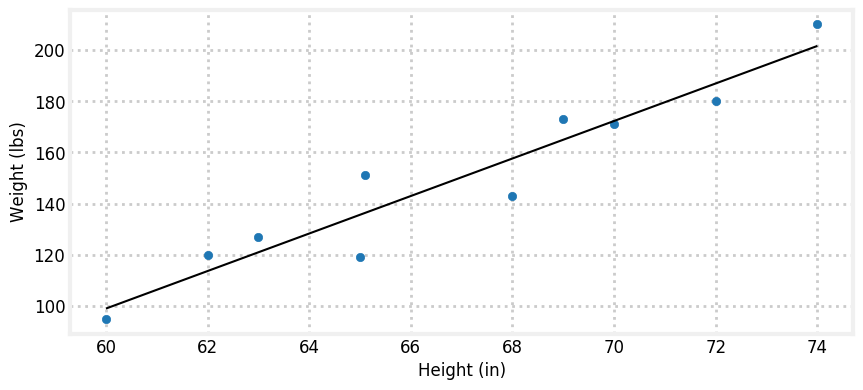

In [4]:
from kf_book.gaussian_internal import plot_correlated_data

height = [60, 62, 63, 65, 65.1, 68, 69, 70, 72, 74]
weight = [95, 120, 127, 119, 151, 143, 173, 171, 180, 210]
plot_correlated_data(height, weight, 'Height (in)', 'Weight (lbs)', False)

In this book we only consider *linear correlation*. We assume that the relationship between variables is linear. That is, a straight line is a good fit for the data. I've fit a straight line through the data in the above chart. The concept of *nonlinear correlation* exists, but we will not be using it.

在本书中我们只考虑*线性相关（linear correlation）*。我们假设变量之间的关系是线性的。也就是说，直线可以很好的拟合数据。我在上图中用直线拟合了数据。存在*非线性相关（nonlinear correlation）*的概念，但我们不会使用它。

The equation for the covariance between $X$ and $Y$ is

变量$ X $和$ Y $之间协方差的公式是

$$ COV(X, Y) = \sigma_{xy} = \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]$$

Where $\mathbb E[X]$ is the *expected value* of X, defined as

其中$\mathbb E[X]$是X的*期望值*，定义为

$$\mathbb E[X] =  \begin{cases} \sum_{i=1}^n p_ix_i & \mbox{discrete}\\ \int_{-\infty}^\infty f(x)\, x & \mbox{continuous}\end{cases}$$

We assume each data point is equally likely, so the probability of each is $\frac{1}{N}$, giving

我们假设每个数据点的可能性相同，因此每个数据点的概率为$\frac{1}{N}$，那么对于离散情况，可以得到

$$\mathbb E[X] =  \frac{1}{N}\sum_{i=1}^n x_i$$

for the discrete case we will be considering.

Compare the covariance equation to the equation for the variance. As you can see they are very similar:

将协方差方程与方差方程进行比较。如您所见，它们非常相似：

$$\begin{aligned}VAR(X) = \sigma_x^2 &= \mathbb E[(X - \mu)^2]\\
COV(X, Y) = \sigma_{xy} &= \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$

In particular, if you compute $COV(X, X)$ you get the equation for $VAR(X)$, which supports my statement that the variance computes how a random variable varies amongst itself.

特别的是，如果你计算$COV(X, X)$，你将得到$VAR(X)$的等式，这也证明了我之前所讲的，即方差计算的是随机变量在其自身之间的变化量。

We use a *covariance matrix* to denote covariances of a multivariate normal distribution, and it looks like this:

我们使用*协方差矩阵（covariance matrix）*来表示多元正态分布的协方差，它就像下面这样：

$$
\Sigma = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
  \sigma_{21} &\sigma_2^2 & \cdots & \sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
 \end{bmatrix}
$$

The diagonal contains the variance for each variable, and the off-diagonal elements contain the covariance between the $i^{th}$ and $j^{th}$ variables. So $\sigma_3^2$ is the variance of the third variable, and $\sigma_{13}$ is the covariance between the first and third variables.

对角线上是每个变量的方差，非对角线的元素是$i^{th}$和$j^{th}$变量之间的协方差。 所以$\sigma_3^2$是第三个变量的方差，而$\sigma_{13}$是第一个和第三个变量之间的协方差。

A covariance of 0 indicates no correlation. If the variance for $x$ is 10, the variance for $y$ is 4, and there is no linear correlation between $x$ and $y$, then we would write

协方差为0表示没有相关性。 如果$x$的方差是10，$y$的方差是4，并且$x$和$y$之间没有线性相关，那么我们会记做

$$\Sigma = \begin{bmatrix}10&0\\0&4\end{bmatrix}$$

If there was a small amount of positive correlation between $x$ and $y$ we might have

如果$ x $和$ y $之间存在少量正相关，那么我们写做

$$\Sigma = \begin{bmatrix}10&1.2\\1.2&4\end{bmatrix}$$

where 1.2 is the covariance between $x$ and $y$. I say the correlation is "small" because the covariance of 1.2 is small relative to the variances of 10. 

其中1.2是$ x $和$ y $之间的协方差。 我们说相关性“很小”，因为协方差1.2相对于方差10很小。

If there was a large amount of negative correlation between  between $x$ and $y$ we might have

如果$ x $和$ y $之间存在大量负相关，会记做
$$\Sigma = \begin{bmatrix}10&-9.7\\-9.7&4\end{bmatrix}$$

The covariance matrix is symmetric. After all, the covariance between $x$ and $y$ is always equal to the covariance between $y$ and $x$. That is, $\sigma_{xy}=\sigma_{yx}$ for any $x$ and $y$.

协方差矩阵是对称的。 毕竟，$ x $和$ y $之间的协方差总是等于$ y $和$ x $之间的协方差。 也就是说，对于任何$ x $和$ y $，$\sigma_{xy}=\sigma_{yx}$。

I fear I might be losing you, so let's work an example. In the **Gaussians** chapter we had a class of students with heights H=[1.8, 2.0, 1.7, 1.9, 1.6] meters. We computed:

我担心会把你搞晕，所以让我们举个例子吧。 在**高斯分布**一章中，我们有一个班的学生，高度为H = [1.8,2.0,1.7,1.9,1.6]。 我们计算：

$$\begin{aligned}
\mathit{VAR}(H) &= E[(H - \mu_H)^2] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i - \mu_H)^2 \\
&= \frac{1}{5}\left[(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2\right] \\
&= 0.02
\end{aligned}$$

Easy, right? If we weigh the students we might find their weights to be W = [70.1, 91.2, 59.5, 93.2, 53.5]. Can we use the covariance equation to create the covariance matrix? Sure. It will look like:

很简单，对吧？如果我们测量学生的体重，我们会得到他们的体重为W = [70.1,91.2,59.5,93.2,53.5]。我们可以使用协方差方程来创建协方差矩阵吗？ 当然。 它看起来像：

$$\Sigma = \begin{bmatrix}\sigma_H^2 & \sigma_{H,W} \\
\sigma_{W,H} & \sigma_{W}^2\end{bmatrix}$$

We just computed the variance of the height, and it will go in the upper left hand corner of the matrix. The lower right corner contains the variance in weights. Using the same equation we get:

我们刚刚计算了身高的方差，它将代入矩阵的左上角。右下角是体重的方差。使用相同的公式，我们可以得到：

$$\begin{aligned}
\mu_W &= \frac{1}{5}(70.1 + 91.2 + 59.5 + 93.2 + 53.5) = 73.5 \\
\sigma_W^2 &= \frac{1}{5}\left[(70.1-73.5)^2 + (91.2-73.5)^2 + (59.5-73.5)^2 + (93.2-73.5)^2 + (53.5-73.5)^2\right] \\
&= 261.8
\end{aligned}$$

Now the covariances. Using the formula above, we compute:

现在利用之前讲到的公式来计算协方差，得到：

$$\begin{aligned}
\sigma_{H,W} &= \mathbb E\big[(H-\mu_H)(W-\mu_W)\big] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i-\mu_H)(W_i-\mu_W) \\
&= \frac{1}{5}[(1.8-1.8)(70.1-73.5) + (2-1.8)(91.2-73.5) + (1.7-1.8)(59.5-73.5)\, +\\
&\, \, \, \,  \, (1.9-1.8)(93.2-73.5) + (1.6-1.8)(53.5-73.5)] \\
&= 2.18
\end{aligned}$$

That was tedious, but easy enough. We will never do that again because, of course, NumPy will compute it for you. 

这很繁琐，但也很容易。我们永远不会那样做，因为，NumPy会为你计算它。

In [5]:
import numpy as np

W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W)

array([[  0.025,   2.727],
       [  2.727, 327.235]])

That doesn't agree with our calculation! What went wrong? Nothing. NumPy applies a correction for small sample sizes; it uses $\frac{1}{N-1}$ as the normalization term instead of $\frac{1}{N}$.

这与我们的计算不一致！ 什么地方出了错？其实没有。NumPy对小样本进行了校正; 它使用$\frac{1}{N-1}$ 作为标准化方法而不是$\frac{1}{N}$。

This is a bit beyond the scope of this book. Briefly, suppose the actual class size is 200 students, and we took a sample of 5 students to perform this computation because we couldn't afford to measure and weigh all 200 students. It is nearly certain that there will be some error in our estimator because the sample is unlikely to perfectly represent the class. As our sample size approaches 200 the error will approach 0. We say there is no *bias* in the latter, and that we have an *unbiased estimator*. In contrast, when we take a small sample there is bias (error is nonzero), and we have a *biased estimator*.

这有点超出了本书的范围。 简而言之，假设实际班级人数为200名学生，因为我们无法测量所有200名学生的身高和体重，我们抽取了5名学生的样本来执行此计算。几乎可以肯定，我们的估计会出现一些误差，因为样本不太可能完美地代表整个班级。当我们的样本量接近200时，误差将接近0。我们说后者没有*偏差*，我们得到的是*无偏估计*。 相反，当我们采取一个小样本时，存在偏差（误差为非零），我们得到的是一个*偏差估计*。

If the error is zero it makes sense to divide by $N$. I will not prove why, but for biased estimators we use $\frac{1}{N-1}$ to correct for the small sample size. NumPy does this by default because in practice we are almost always working from data samples from a larger collection. If you want the unbiased estimator, which we computed above, use `bias=1` in the call to `np.cov'.

如果误差为零，那么除以$ N $是有意义的。我不去证明为什么，但对于有偏差的估计，我们使用 $\frac{1}{N-1}$ 来校正小样本量。NumPy默认会执行此操作，因为在实践中，我们几乎总是使用来自较大集合的数据样本。如果你想要我们在上面计算的无偏估计量，在调用 `np.cov` 时使用参数 `bias = 1`。

In [5]:
np.cov(H, W, bias=1)

array([[  0.02 ,   2.182],
       [  2.182, 261.788]])

This agrees with our computation. We will not use `bias=1` again in this book since we are using *random variables* which are sampling from the infinite set of positions of the objects we are tracking. Here we are computing the variance and covariance for the entire population, so `bias=1` is correct.

这样就与我们的计算结果一致了。我们不会在本书中再次使用`bias = 1`，因为我们使用的是*随机变量*，它是我们从跟踪的对象的无限位置集合中采样得到的。在这个例子中，我们计算的是整个总体的方差和协方差，因此`bias = 1`是正确的。

What does this matrix tell us? It tells us the variance in heights is 0.02 $m^2$ and the variance in weights is 261.788 $kg^2$. Furthermore, it tells us the weights and heights are positively correlated - as heights increase so do the weights.

这个矩阵告诉我们什么？ 它告诉我们身高的方差是0.02  $m^2$ ，体重的方差是261.788 $ kg^2 $。 此外，它告诉我们权重和高度正相关——随着身高的增加，体重也在增加。

Let's create perfectly correlated data. By this I mean that the data perfectly fits on a line - there is no variance from the line.

让我们创建完美相关的数据。 我的意思是数据完全拟合成一条线——直线上没有方差。

In [6]:
X = np.linspace(1, 10, 100)
Y = np.linspace(1, 10, 100)
np.cov(X, Y)

array([[6.956, 6.956],
       [6.956, 6.956]])

We can see from the covariance matrix that the covariance is equal to the variance in x and in y. 

我们可以从协方差矩阵中看出，协方差等于x和y的方差。

Now let's add some noise to one of the variables so that they are no longer perfectly correlated. I will make $Y$ negative to create a negative correlation.

现在让我们为其中一个变量添加一些噪音，使它们不再完全相关。 我将使 $Y$ 产生负相关。

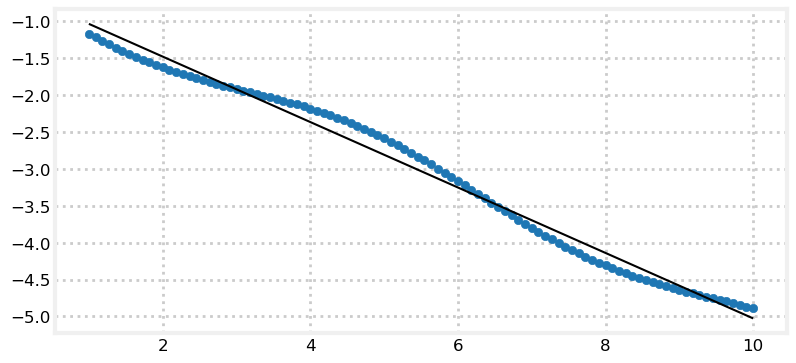

[[ 6.956 -3.084]
 [-3.084  1.387]]


In [7]:
X = np.linspace(1, 10, 100)
Y = -(np.linspace(1, 5, 100) + np.sin(X)*.2)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

The data no longer forms a straight line. The covariance is $\sigma_{xy}=-3.08$. It is not close to zero compared to the magnitudes of $\sigma_x^2$ and $\sigma_y^2$, and so we know there is still a high degree of correlation. We can verify this by looking at the chart. The data forms nearly a straight line.

数据不再形成直线。协方差是$\sigma_{xy}=-3.08$。 与$ \ sigma_x^2 $和$ \ sigma_y^2 $的大小相比，它不接近于零，因此我们知道仍然存在高度相关性。 我们可以通过查看图表来验证这一点。 数据几乎形成一条直线。

Now I will add random noise to a straight line.

现在我将随机噪声添加到直线上。

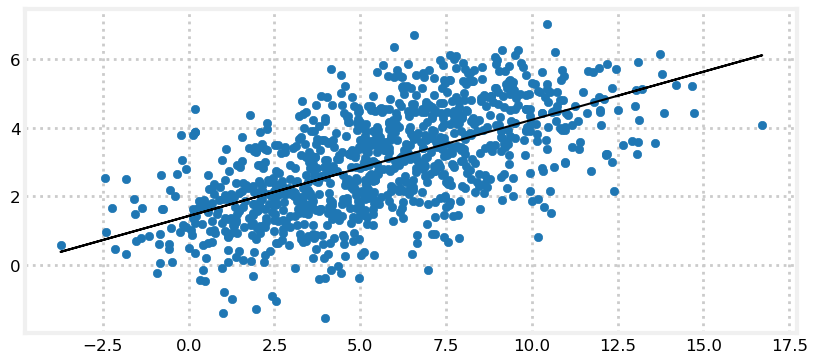

[[10.828  3.034]
 [ 3.034  2.322]]


In [8]:
from numpy.random import randn
X = np.linspace(1, 10, 1000) + randn(1000)*2
Y = np.linspace(1, 5, 1000) + randn(1000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

We see that the covariance is smaller in relation to the variances, reflecting the lower correlation between $X$ and $Y$. We can still fit a straight line through this data, but there is much greater variation in the data.

我们看到协方差相对于方差较小，反映出$ X $和$ Y $之间的相关性较低。 我们仍然可以通过这些数据直线拟合，但数据的变化的更多。

Finally, here is the covariance between completely random data.

最后，来看看完全随机数据之间的协方差。

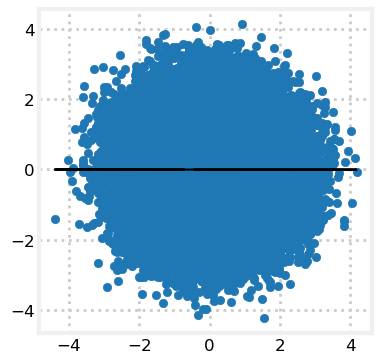

[[ 1.001 -0.   ]
 [-0.     1.007]]


In [9]:
X = randn(100000)
Y = randn(100000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

Here the covariances are very near zero. As you can see with the plot, there is no clear way to draw a line to fit the data. A vertical line would be as unconvincing as the horizontal line I've shown.

这里的协方差非常接近于零。 正如您在绘图中看到的那样，没有明确的方法来绘制线以适合数据。 垂直线与我所示的水平线一样难以令人信服。

## Multivariate Normal Distribution Equation
## 多元正态分布方程

Recall the equation for the normal distribution from the **Gaussians** chapter:

先回想一下**高斯分布**一章的正态分布的公式：

$$ 
f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \Big [{-\frac{1}{2}}{(x-\mu)^2}/\sigma^2 \Big ]
$$


Here is the multivariate normal distribution in $n$ dimensions.

以下是$ n $维度中的多元正态分布。

$$
f(\mathbf{x},\, \mu,\,\Sigma) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}\, \exp  \Big [{ -\frac{1}{2}(\mathbf{x}-\mu)^\mathsf{T}\Sigma^{-1}(\mathbf{x}-\mu) \Big ]}
$$

The multivariate version merely replaces the scalars of the univariate equations with matrices. If you are reasonably well-versed in linear algebra this equation should look quite manageable. If not, don't worry, both FilterPy and SciPy provide functions to compute it for you. Let's ignore the computation for a moment and plot it to see what it looks like.

多变量版本的公式使用矩阵替换单变量方程的标量。 如果你对线性代数相当的精通，那么这个等式应该看起来很容易。如果理解，也请不要担心，FilterPy和SciPy都为您提供了计算的功能。 让我们暂时忽略如何计算，画图以查看它的形状。

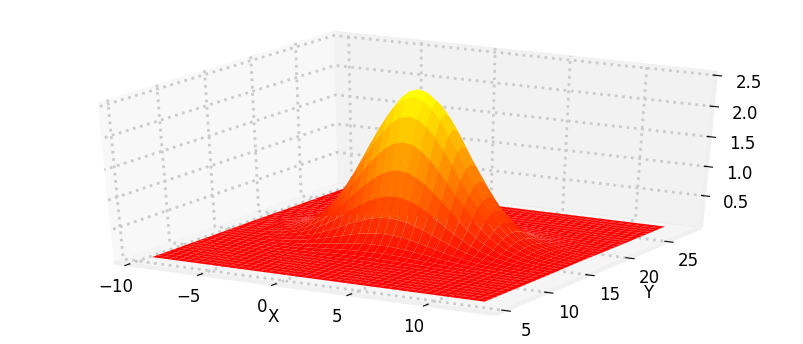

In [6]:
import kf_book.mkf_internal as mkf_internal

mean = [2., 17.]
cov = [[10., 0.], 
       [0., 4.]]

mkf_internal.plot_3d_covariance(mean, cov)

This is a plot of multivariate Gaussian with a mean of $\mu=[\begin{smallmatrix}2\\17\end{smallmatrix}]$ and a covariance of $\Sigma=[\begin{smallmatrix}10&0\\0&4\end{smallmatrix}]$. The three dimensional shape shows the probability density for any value of $(X, Y)$ in the z-axis. I have projected the variance for x and y onto the walls of the chart - you can see that they take on the Gaussian bell curve shape. The curve for $X$ is wider than the curve for $Y$, which is explained by $\sigma_x^2=10$ and $\sigma_y^2=4$. The highest point of the 3D surface is at the the means for $X$ and $Y$. 

这是一个多元高斯分布的图形，其平均值为$\mu=[\begin{smallmatrix}2\\17\end{smallmatrix}]$和协方差为$\Sigma=[\begin{smallmatrix}10&0\\0&4\end{smallmatrix}]$。 三维图形中z轴表示任意$(X, Y)$值的概率密度。我已将x和y的方差投影到图表的墙上 - 您可以看到它们是高斯分布的钟形曲线形状。 $ X $的曲线比$ Y $的曲线宽，这可以通过 $\sigma_x^2=10$ 和$\sigma_y^2=4$来说明。3D表面的最高点是$ X $和$ Y $的均值。

All multivariate Gaussians have this shape. If we think of this as the Gaussian for the position of a dog, the z-value at each point of ($X, Y$) is the probability density of the dog being at that position. Strictly speaking this is the *joint probability density function*, which I will define soon. So, the dog has the highest probability of being near (2, 17), a modest probability of being near (5, 14), and a very low probability of being near (10, 10). As with the univariate case this is a *probability density*, not a *probability*. Continuous distributions have an infinite range, and so the probability of being exactly at (2, 17), or any other point, is 0%. We can compute the probability of being within a given range by computing the volume under the surface with an integral.

所有多变量高斯都是这种形状。 如果我们认为这是狗位置的高斯分布，那么每个点($X, Y$)的z值就是狗在该位置时的概率密度。 严格来说，这是*联合概率密度函数（joint probability density function）*，我一会会对它做出定义定义。 因此，狗接近（2,17）的概率最大，接近（5,14）的概率很小，接近（10,10）的概率非常低。 与单变量情况一样，这是*概率密度*，而不是*概率*。 连续分布具有无限范围，因此精确位于（2,17）或任何其他点的概率为0％。 我们可以通过用积分计算表面下的体积来计算在给定范围内的概率。

FilterPy [2] implements the equation with the function `multivariate_gaussian()` in the `filterpy.stats.` module. SciPy's `stats` module implements the multivariate normal equation with `multivariate_normal()`. It implements a 'frozen' form where you set the mean and covariance once, and then calculate the probability density for any number of values for x over any arbitrary number of calls. I named my function `multivariate_gaussian()` to ensure it is never confused with the SciPy version.

FilterPy [2]在`filterpy.stats.`模块中使用函数`multivariate_gaussian()`实现该公式。SciPy的`stats`模块使用`multivariate_normal()`实现多元正态方程。 它实现了一个“固定”形式，您可以在其中设置一次均值和协方差，然后计算任意数量的调用中任意x的概率密度。 我把我的函数命名为`multivariate_gaussian（）`以确保它不会与SciPy版本的函数混淆。

> The <a href="http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html">tutorial</a>[1] for the `scipy.stats` module explains 'freezing' distributions and other very useful features.

>`scipy.stats`模块的<a href="http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html">教程</a> [1]解释了'固定' 分布和其他非常有用的功能。

In [9]:
from filterpy.stats import gaussian, multivariate_gaussian

I'll demonstrate using it, and then move on to more interesting things.

我将展示如何使用它，然后进行更有趣的事情。

First, let's find the probability density for our dog being at (2.5, 7.3) if we believe he is at (2, 7) with a variance of 8 for $x$ and a variance of 3 for $y$.

首先，我们计算我们的狗在（2.5,7.3）的概率密度，如果我们认为狗在（2,7）时，$ x $的方差为8，$ y $的方差为3。

Start by setting $x$ to (2.5, 7.3). You can use a tuple, list, or NumPy array.

首先设置$ x $为（2.5,7.3）。 您可以使用元组，列表或NumPy数组。

In [10]:
x = [2.5, 7.3]

Next, we set the mean of our belief:

接下来，我们设置我们的置信度的平均值：

In [11]:
mu = [2.0, 7.0]

Finally, we have to define our covariance matrix. In the problem statement we did not mention any correlation between $x$ and $y$, and we will assume there is none. This makes sense; a dog can choose to independently wander in either the $x$ direction or $y$ direction without affecting the other. I will use the variable name `P`. Kalman filters use the name $\textbf{P}$ for the covariance matrix, and we need to become familiar with the conventions.

最后，我们必须定义我们的协方差矩阵。 在这个问题中，我们没有提到$ x $和$ y $之间有任何关联，那么我们假设没有。这是有道理的; 一只狗可以选择在$ x $方向或$ y $方向上独立走动，而不会影响另一方。 我将使用变量`P`来表示。卡尔曼滤波器使用名称$ \textbf {P} $作为协方差矩阵，我们需要熟悉这些约定。

In [12]:
P = [[8., 0.], 
     [0., 3.]]

Now call the function

现在调用函数

In [13]:
%precision 4
multivariate_gaussian(x, mu, P)

0.0315

We can get the same result from the `scipy.stats` module.

我们可以通过`scipy.stats`得到相同的结果。

In [14]:
import scipy
try:
    print('{:.4f}'.format(scipy.stats.multivariate_normal(mu, P).pdf(x)))
except:
    print('you have an old version of scipy, upgrade it now!')

0.0315


It's time to define some terms. The *joint probability*, denoted $P(x,y)$, is the probability of both $x$ and $y$ happening.  For example, if you roll two die $P(2,5)$ is the probability of the first die rolling a 2 and the second die rolling a 5. Assuming the die are six sided and fair, the probability $P(2,5) = \frac{1}{6}\times \frac{1}{6}=\frac{1}{36}$. The 3D chart above shows the *joint probability density function*.

现在需要定义一些术语了。 *联合概率（joint probability）*表示为$P(x,y)$，是当$ x $和$ y $同时发生的概率。 例如，如果你掷两次骰子$ P（2,5）$就是第一次为2和第二次为5的概率。假设骰子有六面和并且是均匀的，那么概率$P(2,5) = \frac{1}{6}\times \frac{1}{6}=\frac{1}{36}$。 上面的3D图表展示了*联合概率密度函数（joint probability density function）*。

The *marginal probability* is the probability of an event happening without regard of any other event. In the chart above the Gaussian curve drawn to the left is the marginal for $Y$. This is the probability for the dog being at any position in $Y$ disregarding the value for $X$. Earlier I wrote "I have projected the variance for x and y onto the walls of the chart"; these are the marginal probabilities for $x$ and $y$. Another computational benefit of Gaussians is that the marginal of a multivariate Gaussian is another Gaussian!

*边际概率（marginal probability）*是事件发生的概率，而不考虑其他任何事件。 在上面的图表中，左边绘制的高斯曲线是$ Y $的边际。 这是狗在$ Y $中任何位置的概率，而不考虑$ X $的值。早些时候我写道“我已经将x和y的方差投影到图表的墙上”; 这些其实就是$ x $和$ y $的边际概率。 高斯分布的另一个优点就是多元高斯的边际是另一个高斯的！

Let's look at this in a slightly different way. Instead of plotting a surface showing the probability distribution I will generate 1,000 points with the distribution of $[\begin{smallmatrix}8&0\\0&3\end{smallmatrix}]$.

让我们以略微不同的方式来看待这个问题。我将生成1,000个点，而不绘制概率分布的曲面，其分布为$ [\ begin {smallmatrix} 8＆0 \\ 0＆3 \ end {smallmatrix}] $。

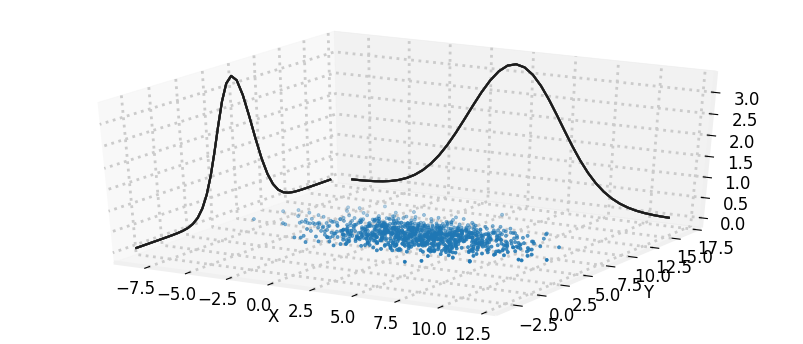

In [15]:
mkf_internal.plot_3d_sampled_covariance(mu, P)

We can think of the sampled points as being possible locations for our dog given those particular mean and covariances. The contours on the side show the marginal probability for $X$ and $Y$. We can see that he is far more likely to be at (2, 7) where there are many points, than at (-5, 5) where there are few.

考虑到这些特定的均值和协方差，我们可以将采样点视为我们的狗的可能位置。 侧面的轮廓显示$ X $和$ Y $的边际概率。 我们可以看到它更有可能在（2,7），而在（-5,5）的可能性很小。

As beautiful as these plots are, it is hard to get useful information from them. For example, it is not easy to tell if $X$ and $Y$ both have the same variance, and how much they are correlated. In most of the book I'll display Gaussians as contour plots.

虽然这些图表很好看，但很难从它们这里获得有用的信息。 例如，要判断$ X $和$ Y $是否具有相同的方差以及它们的相关程度并不容易。在本书的大部分内容中，我将高斯分布显示为等高线图。

The contour plots display the range of values that the multivariate Gaussian takes for a specific standard deviation. This is like taking a horizontal slice out of the 3D plot.

等值线图显示多元高斯对特定标准偏差所取的值范围。 这就像从3D绘图中取出一个水平切片。

These plots show the shape of the slice for 3 standard deviations.

下面的图显示了3个标准偏差的切片形状。

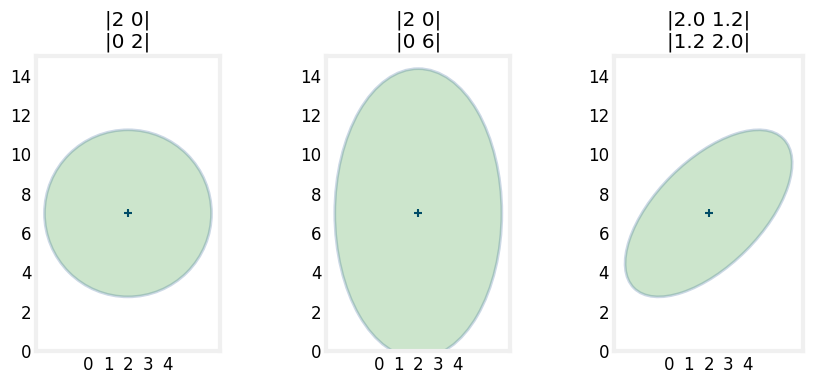

In [17]:
mkf_internal.plot_3_covariances()

For those of you viewing this online or in Juptyer Notebook on your computer, here is an animation of varying the covariance while holding the variance constant.

对于那些在线观看或在计算机上的Jupyter笔记本中阅读的读者，这里有一个在保持方差不变的同时改变协方差的动画。

<img src='animations/multivariate_ellipse.gif'>

(source: http://git.io/vqxLS)

These plots look like circles and ellipses. Indeed, it turns out that any slice through the multivariate Gaussian is an ellipse. Hence, in statistics we do not call these 'contour plots', but either *error ellipses* or *confidence ellipses*; the terms are interchangable.

这些图看起来像圆圈和椭圆。实际上，事实证明，通过多元高斯分布的任何切片都是椭圆形。因此，在统计学中我们不称这些图为'等高线图'，而是叫做*误差椭圆（error ellipses）*或*置信椭圆（confidence ellipses）*; 这些术语是等价的。

This code uses the function `plot_covariance_ellipse()` from `filterpy.stats`. By default the function displays one standard deviation, but you can use either the `variance` or `std` parameter to control what is displayed. For example, `variance=3**2` or `std=3` would display the 3rd standard deviation, and `variance=[1,4,9]` or `std=[1,2,3]` would display the 1st, 2nd, and 3rd standard deviations. 

这里的代码使用了`filterpy.stats`中的`plot_covariance_ellipse()`函数。 默认情况下，该函数绘制一个标准偏差的图像，但您可以使用`variance`或`std`参数来控制显示的内容。 例如，`variance = 3 ** 2`或`std = 3`将绘制3个标准差的图像，甚至指定`variance = [1,4,9]`或`std = [1,2,3]`时，将同时绘制出1个，2个和3个标准偏差的图像。

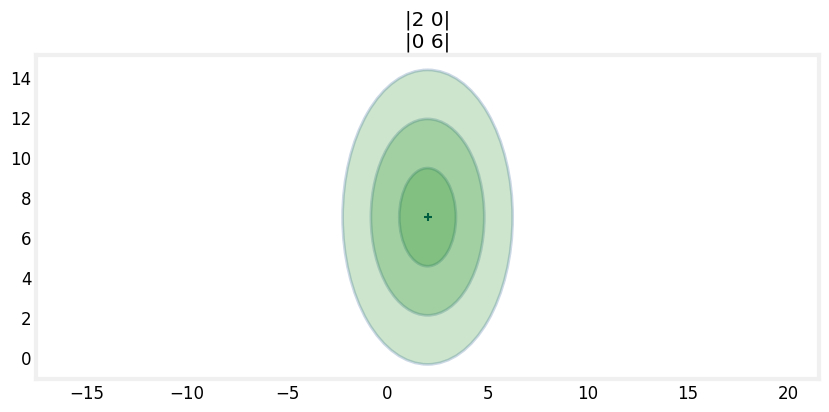

In [18]:
from filterpy.stats import plot_covariance_ellipse
import matplotlib.pyplot as plt

P = [[2, 0], [0, 6]]
plot_covariance_ellipse((2, 7), P, fc='g', alpha=0.2, 
                        std=[1, 2, 3],
                        title='|2 0|\n|0 6|')
plt.gca().grid(b=False);

The solid colors may suggest to you that the probability distribution is constant between the standard deviations. This is not true, as you can tell from the 3D plot of the Gaussian. Here is a 2D shaded representation of the probability distribution for the covariance ($\begin{smallmatrix}2&1.2\\1.2&1.3\end{smallmatrix})$. Darker gray corresponds to higher probability density.

纯色可能会向您表明概率分布在标准偏差之间是恒定的。但事实并非如此，正如您可以从高斯的3D图中看出的那样。下面是协方差概率分布的二维阴影表示($\begin{smallmatrix}2&1.2\\1.2&1.3\end{smallmatrix})$。 较深的灰色对应于较高的概率密度。

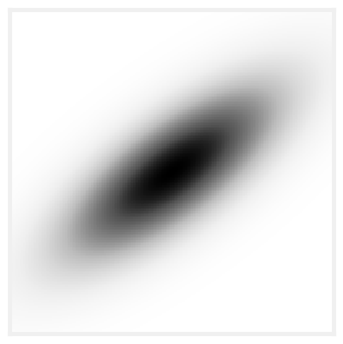

In [20]:
from kf_book.nonlinear_plots import plot_cov_ellipse_colormap
plot_cov_ellipse_colormap(cov=[[2, 1.2], [1.2, 1.3]]);

Thinking about the physical interpretation of these plots clarifies their meaning. The mean and covariance of the first plot is

考虑这些图的物理解释说明了什么含义。 第一个图的均值和协方差是

$$
\mathbf{\mu} =\begin{bmatrix}2\\7\end{bmatrix},\, \,
\Sigma = \begin{bmatrix}2&0\\0&2 \end{bmatrix}
$$ 

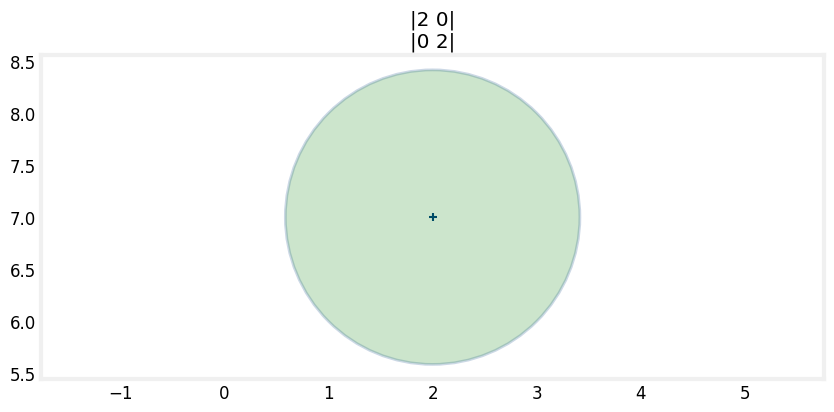

In [19]:
x = [2, 7]
P = [[2, 0], [0, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                       title='|2 0|\n|0 2|')
plt.gca().grid(b=False)

A Bayesian way of thinking about this is that the ellipse shows us the amount of error in our belief. A tiny circle would indicate that we have a very small error, and a very large circle indicates a lot of error in our belief. The shape of the ellipse shows us the geometric relationship of the errors in $X$ and $Y$. Here we have a circle so errors in $X$ and $Y$ are equally likely.

贝叶斯的一种思考方式是这个椭圆向我们展示了我们置信度中的误差量。 一个小圆圈表示我们的误差一个非常小，一个非常大的圆圈表明我们的置信度存在很多误差。椭圆的形状向我们显示了$ X $和$ Y $中误差的几何关系。这里我们有一个圆圈，所以$ X $和$ Y $的误差可能是相同的。

The mean and covariance of the second plot are

第二个图的均值和协方差是

$$
\mu =\begin{bmatrix}2\\7\end{bmatrix}, \, \, \, 
\Sigma = \begin{bmatrix}2&0\\0&6\end{bmatrix}
$$

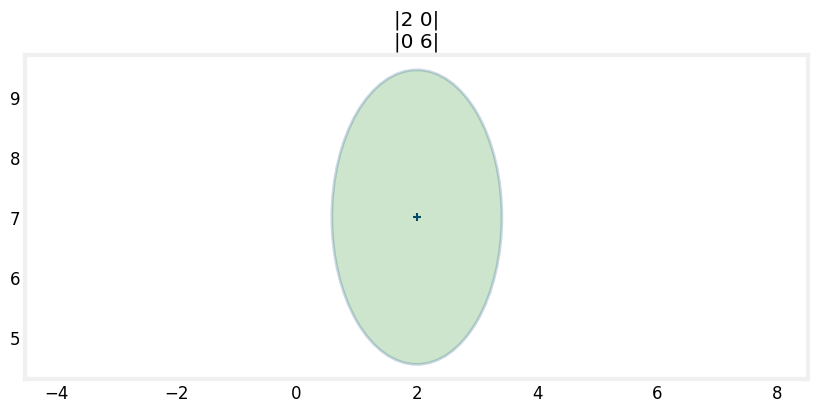

In [20]:
x = [2, 7]
P = [[2, 0], [0, 6]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 0|\n|0 6|')
plt.gca().grid(b=False)

This time we use a different variance for $X$ ($\sigma_x^2=2$) vs $Y$ ($\sigma^2_y=6$). The result is a tall and narrow ellipse. We can see that a lot more uncertainty in $Y$ vs $X$. In both cases we believe the dog is at (2, 7), but the uncertainties are different.

这次我们$X$ ($\sigma_x^2=2$)与$Y$ ($\sigma^2_y=6$)的方差不同。绘制的结果是一个高而窄的椭圆。我们可以看到$Y$比$X$的不确定性更大。在这两种情况下，我们都认为狗是在（2,7），但不确定性是不同的。

The third plot shows the mean and covariance

第三个图显示的均值和协方差是

$$
\mu =\begin{bmatrix}2\\7\end{bmatrix}, \, \, \, 
\Sigma = \begin{bmatrix}2&1.2\\1.2&2\end{bmatrix}
$$

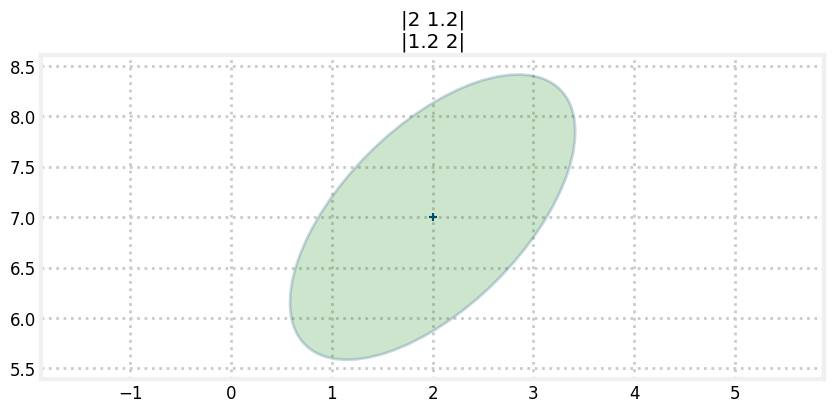

In [21]:
x = [2, 7]
P = [[2, 1.2], [1.2, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 1.2|\n|1.2 2|')

This is the first contour that has values in the off-diagonal elements of the covariance, and this is the first contour plot with a slanted ellipse. This is not a coincidence. The two facts are telling us the same thing. A slanted ellipse tells us that the $x$ and $y$ values are somehow correlated. The off-diagonal elements in the covariance matrix are non-zero, indicating that a correlation exists.

这是第一个协方差在非对角线元素中有值的图像，这也是第一个倾斜椭圆形式的等高线图。这不是巧合。这两个事实告诉我们同样的事情。倾斜的椭圆告诉我们$ x $和$ y $值以某种方式相关。协方差矩阵中的非对角线元素非零，也表明他们存在相关性。

Recall the plot for height versus weight. It formed a slanted grouping of points. We can use NumPy's `cov()` function to compute the covariance of two or more variables by placing them into a 2D array. Let's do that, then plot the $2\sigma$ covariance ellipse on top of the data. We will need to use `bias=1` because the data represents the entire population; it is not a sample.

回想一下身高与体重的关系图。它形成了一组倾斜的点。我们通过将它们放入2D数组,然后使用NumPy的`cov()`函数来计算两个或多个变量的协方差。 这样做之后，根据数据画出$ 2 \sigma $的协方差椭圆。 我们需要使用`bias = 1`，因为数据代表整体，而不是一个样本。

In [22]:
cov_hw = np.cov(np.vstack((height, weight)), bias=1)
cov_hw

array([[  18.5249,  135.701 ],
       [ 135.701 , 1092.29  ]])

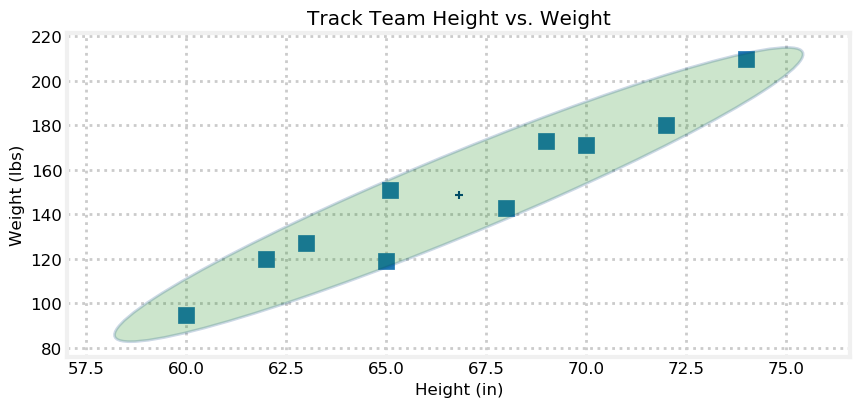

In [25]:
plt.scatter(height, weight, s=120, marker='s')
plt.title('Track Team Height vs. Weight')
plt.xlabel('Height (in)'); plt.ylabel('Weight (lbs)')
plot_covariance_ellipse((np.mean(height), np.mean(weight)), cov_hw, fc='g', 
                        alpha=0.2, axis_equal=False, std=2)

This should help you form a strong intuition on the meaning and use of covariances. The covariance ellipse shows you how the data is 'scattered' in relation to each other. A narrow ellipse like this tells you that the data is very correlated. There is only a narrow range of weights for any given height. The ellipse leans towards the right, telling us there is a positive correlation - as x increases y also increases. If the ellipse leaned towards the left then the correlation would be negative - as x increases y decreases. We can see this in the following plot:

这应该有助于您对协方差的含义和用法形成更好的直观感受。协方差椭圆显示数据是否相互“分散”。 像这样的窄椭圆告诉您数据之间非常相关。对于任何给定的身高，只有很小的体重范围。 椭圆向右倾斜，告诉我们存在正相关——随着x增加y也增加。如果椭圆向左倾斜，则相关性将为负 ——随着x增加y减小。我们可以在下面的图中看到这一点：

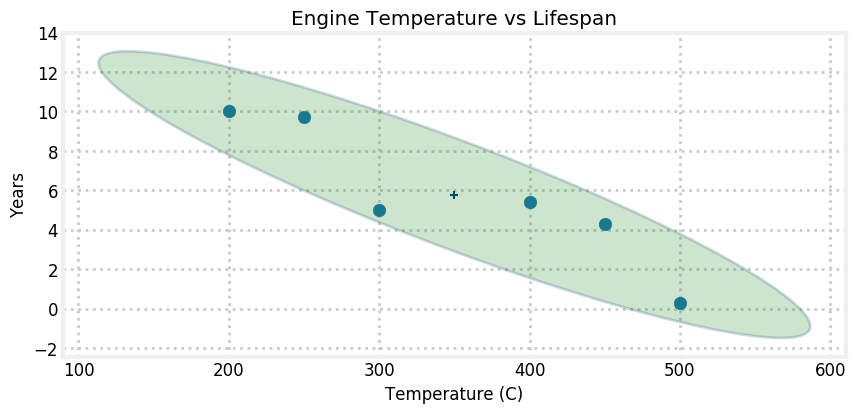

In [23]:
max_temp = [200, 250, 300, 400, 450, 500]
lifespan = [10, 9.7, 5, 5.4, 4.3, 0.3]

plt.scatter(max_temp, lifespan, s=80)
cov = np.cov(np.vstack((max_temp, lifespan)))
plot_covariance_ellipse((np.mean(max_temp), np.mean(lifespan)), cov, fc='g', 
            alpha=0.2, axis_equal=False, std=2)
plt.title('Engine Temperature vs Lifespan')
plt.xlabel('Temperature (C)'); plt.ylabel('Years');

The relationships between variances and covariances can be hard to puzzle out by inspection, so here is an interactive plot. (If you are reading this in a static form instructions to run this online are here: https://git.io/vza7b)

方差和协方差之间的关系很难通过检查来判断，所以这里有一个交互式的绘图过程。（如果您是以静态形式阅读此内容，请在线运行此说明：https：//git.io/vza7b）

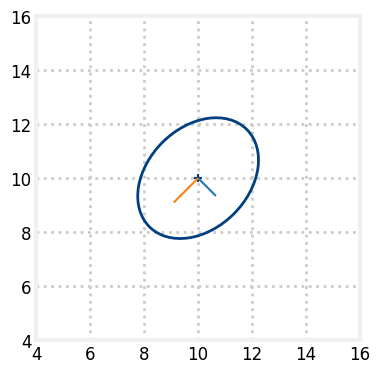

In [24]:
from ipywidgets import interact
from kf_book.book_plots import figsize, FloatSlider

fig = None
def plot_covariance(var_x, var_y, cov_xy):
    global fig
    if fig: plt.close(fig)
    fig = plt.figure(figsize=(4,4))
    P1 = [[var_x, cov_xy], [cov_xy, var_y]]

    plot_covariance_ellipse((10, 10), P1, axis_equal=False,
                            show_semiaxis=True)

    plt.xlim(4, 16)
    plt.gca().set_aspect('equal')
    plt.ylim(4, 16)

    
with figsize(y=6):
    interact (plot_covariance,           
          var_x=FloatSlider(5, min=0, max=20), 
          var_y=FloatSlider(5, min=0, max=20), 
          cov_xy=FloatSlider(1.5, min=0, max=50, step=.2));

### Pearson's Correlation Coefficient
### 皮尔逊相关系数

We will not be using this coefficient in this book, but you may see it elsewhere. You can safely skip this section if uninterested.

我们不会在本书中使用此系数，但您可能会在其他地方看到它。如果不感兴趣，您可以安全地跳过此部分。

The correlation between two variables can be given a numerical value with *Pearson's Correlation Coefficient*. It is defined as

两个变量之间的相关性可以用*皮尔逊相关系数*来表示。 它被定义为

$$\rho_{xy} = \frac{COV(X, Y)}{\sigma_x \sigma_y}$$

This value can range in value from -1 to 1. If the covariance is 0 than $\rho=0$. A value greater than 0 indicates that the relationship is a positive correlation, and a negative value indicates that there is a negative correlation. Values near -1 or 1 indicate a very strong correlation, and values near 0 indicate a very weak correlation.

此值的值范围为-1到1.如果协方差为0，那么$\rho=0$。 大于0表示该关系是正相关，而负值表示存在负相关。 接近-1或1的值表示具有非常强的相关性，接近0的值表示相关性很小。

Correlation and covariance are very closely related. Covariance has units associated with it, and correlation is a unitless ratio. For example, for our dog $\sigma_{xy}$ has units of meters squared.

相关性和协方差密切相关。协方差具有与之相关的单位，而相关性是无单位的比率。例如，对于我们的狗$\sigma_{xy}$的单位是平方米。

We can use `scipy.stats.pearsonr` function to compute the Pearson coefficient. It returns a tuple of the Pearson coefficient and of the 2 tailed p-value. The latter is not used in this book. Here we compute $\rho$ for height vs weight of student athletes:

我们可以使用`scipy.stats.pearsonr`计算皮尔逊相关系数。它返回的是皮尔逊系数和p值的元组。后者未在本书中使用。我们用下面的函数计算 $\rho$的学生身高和体重的皮尔逊相关系数：

In [26]:
from scipy.stats import pearsonr
pearsonr(height, weight)

(0.9539731096080193, 1.8570905971440277e-05)

Here we compute the correlation between engine temperature and lifespan.

在这里，我们计算发动机温度和寿命之间的相关性。

In [27]:
pearsonr(max_temp, lifespan)[0]

-0.9178223453527256

## Using Correlations to Improve Estimates
## 使用相关性来改善估计

Suppose we believe our dog is at position (5, 10) with some given covariance. If the standard deviation in x and y is each 2 meters, but they are strongly correlated, the covariance contour would look something like this.

假设我们相信我们的狗在位置（5,10）具有一些给定的协方差。 如果x和y的标准偏差均为2米，但它们是强相关的，则协方差轮廓看起来像这样。

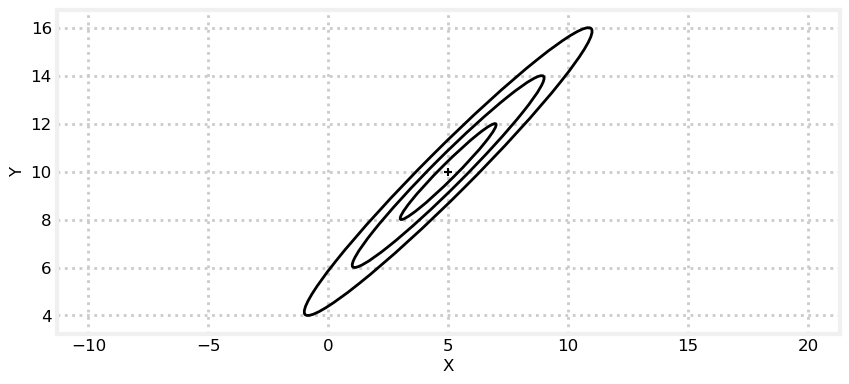

In [30]:
P = [[4, 3.9], [3.9, 4]]

plot_covariance_ellipse((5, 10), P, ec='k', std=[1, 2, 3])
plt.xlabel('X')
plt.ylabel('Y');

Now suppose I were to tell you that we know that $x=7.5$. What can we infer about the value for $y$? The position is extremely likely to lie within the 3$\sigma$ covariance ellipse. We can infer the position in *y* based on the covariance matrix because there is a correlation between *x* and *y*. I've illustrated the likely range of values for y as a blue filled circle.

现在假设我告诉你我们知道$ x = 7.5 $。 我们可否推断出$ y $的值呢？ 该位置极可能位于3 $ \sigma $的协方差椭圆内。 我们可以基于协方差矩阵推断*y*的位置，因为*x*和*y*之间存在相关性。 我已经将y的可能值范围说明为蓝色圆圈。

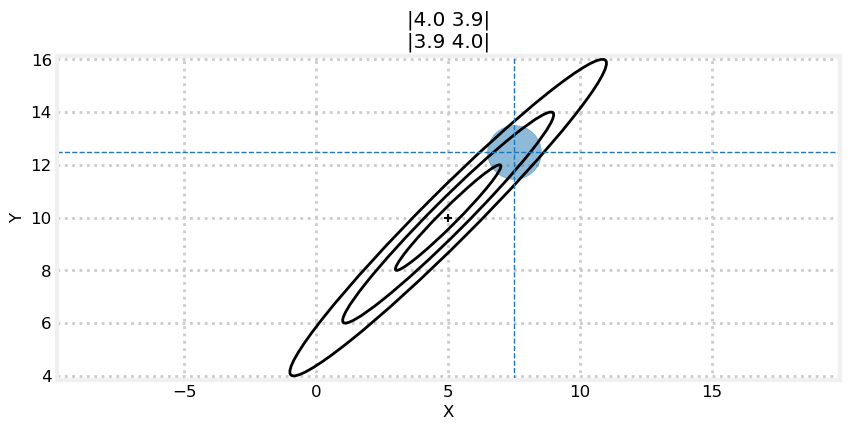

In [31]:
mkf_internal.plot_correlation_covariance()

The circle not mathematically correct, but it gets the idea across. We will tackle the mathematics in the next section. For now recognize that we can predict that $y$ is likely near 12. A value of $y=-10$ is extremely improbable.

这个圆圈在数学上并不正确，但它可以解决这个问题。 我们将在下一节讨论数学问题。 现在我们可以预测$ y $的值很可能接近12。而$ y = -10 $极不可能。

A word about *correlation* and *independence*. If variables are *independent* they can vary separately. If you walk in an open field, you can move in the $x$ direction (east-west), the $y$ direction(north-south), or any combination thereof. Independent variables are always also *uncorrelated*. Except in special cases, the reverse does not hold true. Variables can be uncorrelated, but dependent. For example, consider $y=x^2$. Correlation is a linear measurement, so $x$ and $y$ are uncorrelated. However, $y$ is dependent on $x$.

关于*相关（correlation）*和*独立（independence）*的概念。如果变量之间是*独立*，它们可以单独变化。如果你走进一个空地，你可以沿$x$轴的方向（东西），$ y $轴方向（南北）或其它任何组合来移动。自变量总是*不相关*。除了特殊情况外，反之则不然。因变量可以是不相关的，但是会是有依赖关系的。 例如，考虑$ y = x ^ 2 $。 相关性是线性的，因此$ x $和$ y $是不相关的。 但是，$ y $依赖于$ x $。

## Multiplying Multidimensional Gaussians
## 多维高斯分布乘法

In the previous chapter we incorporated an uncertain measurement with an uncertain estimate by multiplying their Gaussians together. The result was another Gaussian with a smaller variance. If two pieces of uncertain information corroborate each other we should be more certain in our conclusion. The graphs look like this:

在前一章中，我们通过将高斯函数相乘来将不确定的度量与不确定的估计结合起来。 相乘的结果是另一个具有较小方差的高斯分布。 如果两条不确定的信息相互证实，那我们可以得出更加确定的结论。 如下所示：

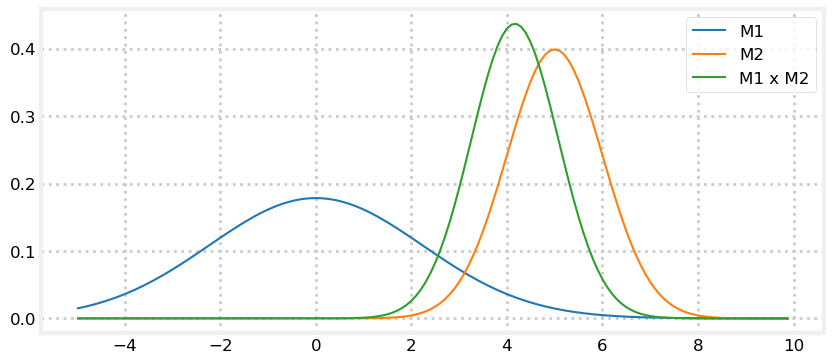

In [32]:
mkf_internal.plot_gaussian_multiply()

The combination of measurements 1 and 2 yields more certainty, so the new Gaussian is taller and narrower - the variance became smaller. The same happens in multiple dimensions with multivariate Gaussians.

测量1和2的组合提供了更多的确定性，因此新的高斯分更高更窄——方差变小。 多变量的高斯分布在多维度上也是如此。

Here are the equations for multiplying multivariate Gaussians. The capital sigma ($\Sigma$) indicates that these are matrices, not scalars. Specifically, they are covariance matrices:

以下是多元高斯的乘法方程。 大写sigma（$\Sigma$）表明这些是矩阵，而不是标量。 具体来说，它们是协方差矩阵：

$$\begin{aligned}
\mu &= \Sigma_2(\Sigma_1 + \Sigma_2)^{-1}\mu_1 + \Sigma_1(\Sigma_1 + \Sigma_2)^{-1}\mu_2 \\
\Sigma &= \Sigma_1(\Sigma_1+\Sigma_2)^{-1}\Sigma_2
\end{aligned}$$


They are generated by plugging the multivariate Gaussians for the prior and the estimate into Bayes Theorem. I gave you the algebra for the univariate case in the  **Gaussians** chapter. 

它们是通过将多元高斯代入贝叶斯定理中的先验和估计而生成的。 我在**高斯**一章中为你给出了单变量情形的代数公式。

You will not need to remember these equations as they are computed by Kalman filter equations that will be presented shortly. This computation is also available in FilterPy using the `multivariate_multiply()` method, which you can import from `filterpy.stats`. 

您不需要记住这些方程式，因为它们是由卡尔曼滤波器方程计算的，这些方程式将很快给出。使用`multivariate_multiply()`方法在FilterPy中也可以使用此计算，您可以从`filterpy.stats`导入该方法。

To give you some intuition about this, recall the equations for multiplying univariate Gaussians:

为了给你一些直观的感受，请回想一下单变量高斯分布的乘法方程式：

$$\begin{aligned}
\mu &=\frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1} {\sigma_1^2 + \sigma_2^2}, \\
\sigma^2 &= \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2}
\end{aligned}$$

This looks similar to the equations for the multivariate equations. This will be more obvious if you recognize that matrix inversion, denoted by the -1 power, is *like* a reciprocal since $AA^{-1} =I$. I will rewrite the inversions as divisions - this is not a mathematically correct thing to do as division for matrices is not defined, but it does help us compare the equations.

如果你明白-1幂表示的矩阵求逆，$AA^{-1} =I$，就*像*倒数一样。那你会明显发现多元方程和这个很类似。我把逆重写为分数——这在数学上不是正确的事情，因为矩阵没有定义除法，但它确实能够帮助我们比较这两个方程。

$$\begin{aligned}
\mu &\approx \frac{\Sigma_2\mu_1 + \Sigma_1\mu_2}{\Sigma_1 + \Sigma_2} \\ \\
\Sigma &\approx \frac{\Sigma_1\Sigma_2}{(\Sigma_1+\Sigma_2)}
\end{aligned}$$

In this form the relationship between the univariate and multivariate equations is clear.

在这种形式中，单变量和多变量方程之间的关系就很清楚了。

Now let's explore multivariate Gaussians in terms of a concrete example. Suppose that we are tracking an aircraft with two radar systems. I will ignore altitude so I can use two dimensional plots. Radar provides the range and bearing to a target. We start out being uncertain about the position of the aircraft, so the covariance, which is our uncertainty about the position, might look like this. In the language of Bayesian statistics this is our *prior*. 

现在让我们从一个具体的例子来探索下多元高斯分布。假设我们正在用两个雷达系统来跟踪飞机。忽略高度，所以我可以使用二维图像。雷达提供目标的距离和方位。我们开始不确定飞机的位置，所以这是我们用协方差矩阵表示对位置的不确定性，可能看起来像这样。 用贝叶斯统计语言来说，这是我们*先验*。

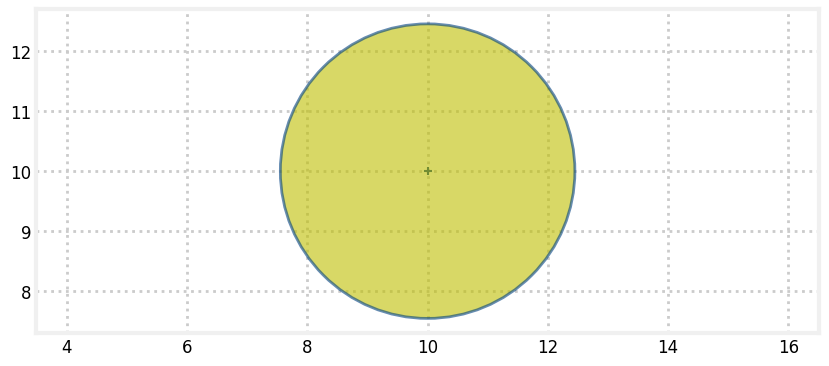

In [28]:
P0 = [[6, 0], [0, 6]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)

Now suppose that there is a radar to the lower left of the aircraft. Further suppose that the radar's bearing measurement is accurate, but the range measurement is inaccurate. The covariance for the error in the measurement might look like this (plotted in green on top of the yellow prior):

现在假设飞机左下方一个雷达。进一步假设该雷达的方位测量是准确的，但距离测量是不准确的。测量误差的协方差可能如下所示（用绿色在先验的黄色上所绘制的）：

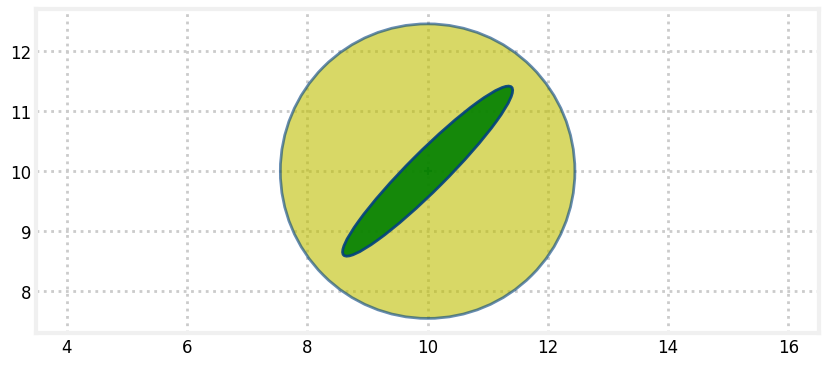

In [34]:
P1 = [[2, 1.9], [1.9, 2]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P1, fc='g', alpha=0.9)

Recall that Bayesian statistics calls this the *evidence*. The ellipse points towards the radar. It is very long because the range measurement is inaccurate, and the aircraft could be within a considerable distance of the measured range. It is very narrow because the bearing estimate is very accurate and thus the aircraft must be very close to the bearing estimate.

回想一下，贝叶斯统计称这是*证据*。 椭圆指向雷达。 这个椭圆非常长的，因为距离测量是不准确的，并且飞机可能在所测量的距离相当大的范围内。它又非常窄，这是因为方位估计是非常准确，因此飞机必须非常接近方位估计。

We want to find the *posterior* - the mean and covariance that results from incorporating the evidence into the prior. As in every other chapter we combine evidence by multiplying them together. 

我们希望找到*后验*——将证据纳先验的结果所产生的均值和协方差。 正如在前面几章中一样，我们将证据和先验相乘。

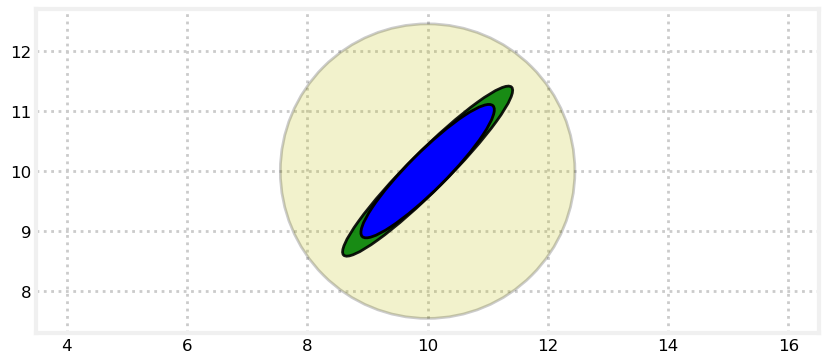

In [35]:
from filterpy.stats import multivariate_multiply

P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.9)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

I have plotted the original estimate (prior) in a very transparent yellow, the radar reading in green (evidence), and the finale estimate (posterior) in blue.

我将原始估计（先验）绘制成非常透明的黄色，雷达的读数绘制为绿色（证据），最后的估计（后验）用蓝色画出。

The posterior retained the same shape and position as the radar measurement, but is smaller. We've seen this with one dimensional Gaussians. Multiplying two Gaussians makes the variance smaller because we are incorporating more information, hence we are less uncertain.  Another point to recognize is that the covariance shape reflects the physical layout of the aircraft and the radar system. The importance of this will become clear in the next step.

后验保持与雷达的测量值相同的形状和位置，但是范围更小。 我们在一维高斯时看过类似的。两个高斯分布相乘后使得方差变小，因为我们收集了更多的信息，因此我们变得不那么不确定。 另一方面，你需要明白协方差形状反映了飞机和雷达系统的物理布局。在下一步中你会更加明白这一点的重要性。

Now let's say we get a measurement from a second radar, this one to the lower right. The posterior from the last step becomes our new prior, which I plot in yellow. The new measurement is plotted in green.

现在假设我们从第二个雷达得到了另一个测量值，这个测量值在右下角。 上一步的后验成为我们的新先验，我用黄色绘制。新测量值用绿色绘制。

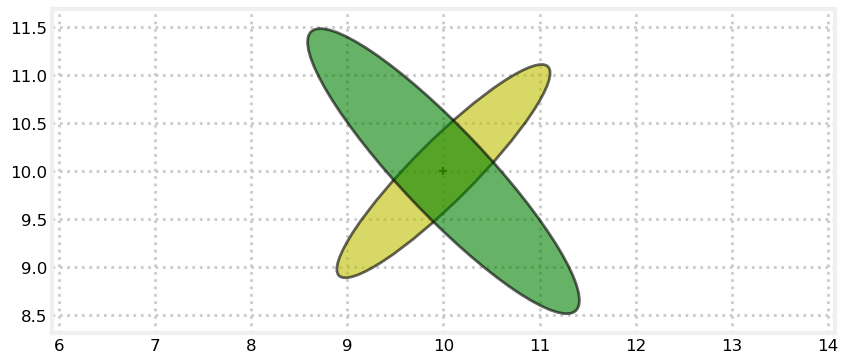

In [36]:
P3 = [[2, -1.9], [-1.9, 2.2]]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)

We incorporate this  information by multiplying the Gaussians:

我们通过高斯分布相乘来合并这些信息：

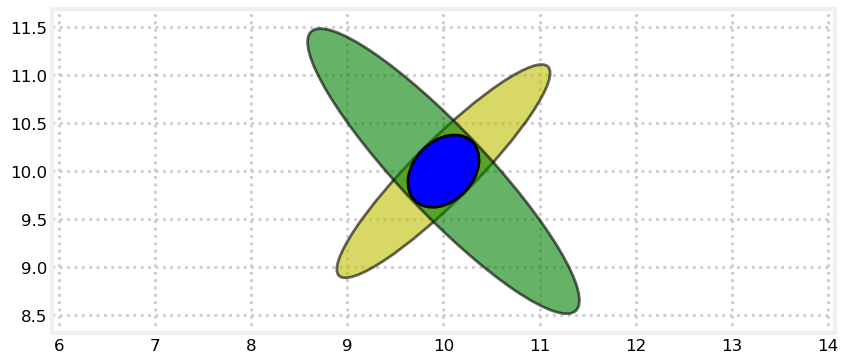

In [37]:
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

The only likely place for the aircraft is where the two ellipses intersect. The intersection, formed by multiplying the prior and measurement, is a new Gaussian. The shapes reflects the geometry of the problem. This allows us to *triangulate* on the aircraft, resulting in a very accurate estimate. We didn't explicitly write any code to perform triangulation; it was a natural outcome of multiplying the Gaussians of each measurement together.

飞机唯一可能的位置是在两个椭圆相交的地方。通过先验和测量相乘形成的交集是新的高斯分布。它的形状反映了问题的几何形状。 我们通过*三角测量*来跟踪飞机，从而得到非常准确的估计。 我们没有明确地编写任何代码来执行三角测量; 这只是将每个测量值的高斯分布乘在一起得到的结果。

Think back to the **g-h Filter** chapter where we displayed the error bars of two weighings on a scale. The estimate must fall somewhere within the region where the error bars overlap. Here the estimate must fall between 161 to 163 pounds.

回想一下**g-h 滤波器**一章中，我们显示了两次称重的误差条。估计值必定落在误差条重叠的区域内。估计值一定在161到163磅之间。

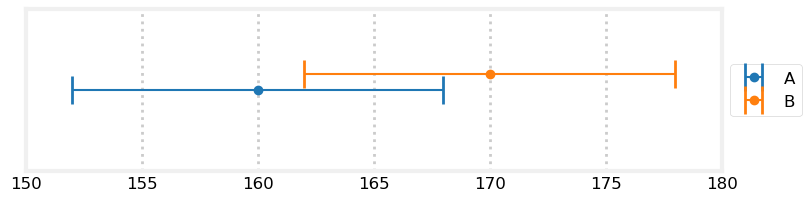

In [38]:
import kf_book.book_plots as book_plots
book_plots.plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

Let's consider a different layout. Suppose the first radar is directly to the left of the aircraft. I can model the measurement error with

让我们考虑一个不同的情况。 假设第一个雷达直接位于飞机左侧。 我可以用测量误差建模
$$\Sigma = \begin{bmatrix}2&0\\0&0.2\end{bmatrix}$$

Here we see the result of multiplying the prior with the measurement.

我们看到将先验与测量相乘的结果如下所示。

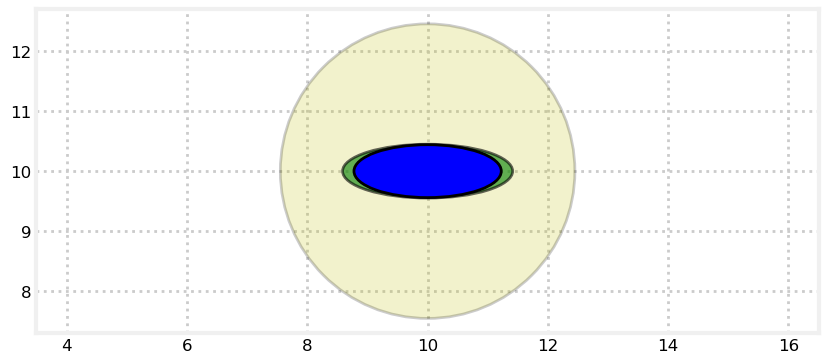

In [39]:
P1 = [[2, 0], [0, .2]]
P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

Now we can incorporate the measurement from the second radar system, which we will leave in the same position as before.

然后我们将第二个雷达系统的测量结果合并到一起，我们将保持与以前相同的位置。

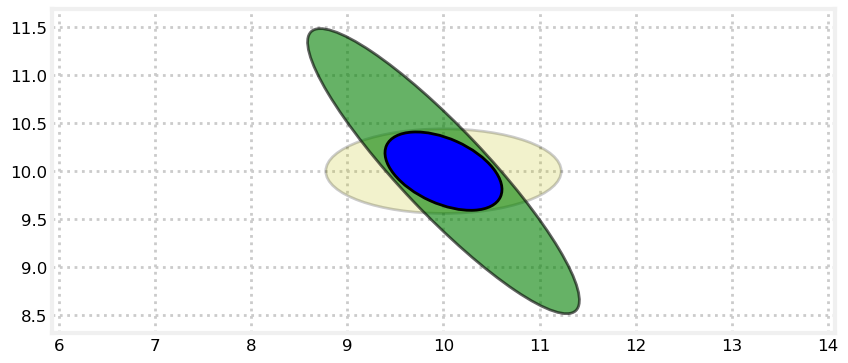

In [40]:
P3 = [[2, -1.9], [-1.9, 2.2]]
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

Our estimate is not as accurate as the previous example.  The two radar stations are no longer orthogonal to each other relative to the aircraft's position so the triangulation is not optimal.

我们的估计不如前面的例子准确。 两个雷达站不再相对于飞机的位置彼此正交，因此三角测量不是最佳的。

For a final example, imagine taking two measurements from the same radar a short time apart. The covariance ellipses will nearly overlap, leaving a very large error in our new estimate:

最后一个例子，想象一下相隔很短的时间从同一个雷达进行两次测量。 协方差椭圆将几乎重叠，在我们新的估计中会产生非常大的误差：

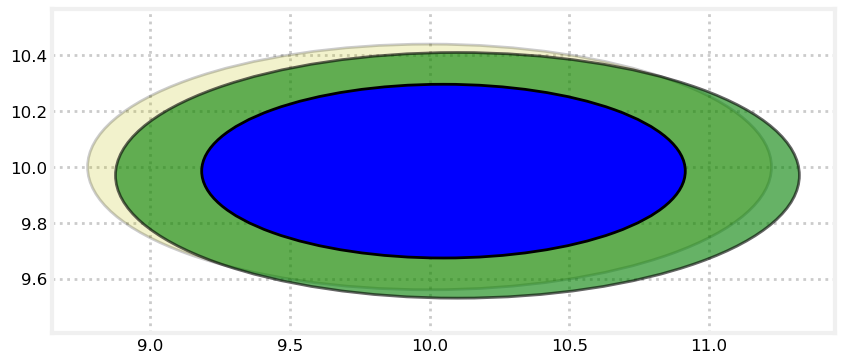

In [41]:
P5 = multivariate_multiply((10,10), P2, (10.1, 9.97), P2)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10.1, 9.97), P2, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse(P5[0], P5[1], ec='k', fc='b')

## Hidden Variables
## 隐藏变量

You can already see why a multivariate Kalman filter can perform better than a univariate one. Correlations between variables can significantly improve our estimates. We can take this much further. **This section contains the key insight to this chapter, so read carefully**.

您已经可以看到为什么多变量卡尔曼滤波器的性能优于单变量卡尔曼滤波器。 变量之间的相关性可以显著改善我们的估计。现在我们可以更进一步。 **本节包含本章的主要内容，请仔细阅读**。

Let's say we are tracking an aircraft and we get the following data for the $x$ and $y$ coordinates at time $t$=1, 2, and 3 seconds. What does your intuition tell you the value of $x$ will be at time $t$=4 seconds?

假设我们正在跟踪一架飞机，我们在$ t $ = 1,2和3秒时得到$ x $和$ y $坐标的以下数据。 你的直觉告诉你在$ t $ = 4秒时，$ x $的值是多少？

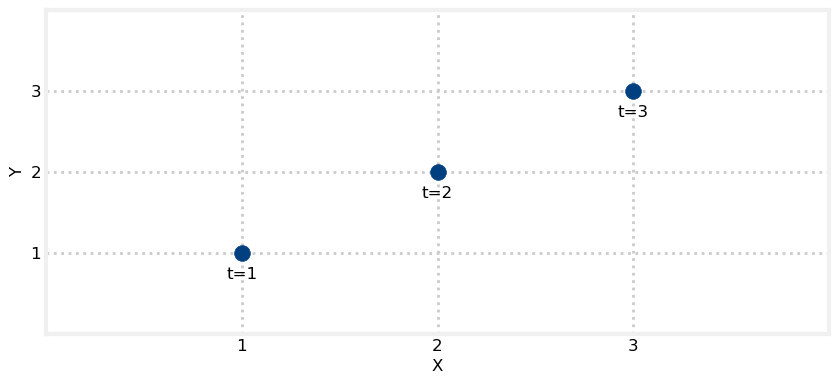

In [42]:
mkf_internal.show_position_chart()

It appears that the aircraft is flying in a straight line and we know that aircraft cannot turn on a dime. The most reasonable guess is that at $t$=4 the aircraft is at (4,4). I will depict that with a green arrow.

看来飞机是直线飞行的，我们假设飞机无法转向。 最合理的猜测是，在$ t $ = 4时，飞机处于（4,4）。 我将用绿色箭头所花出来的。

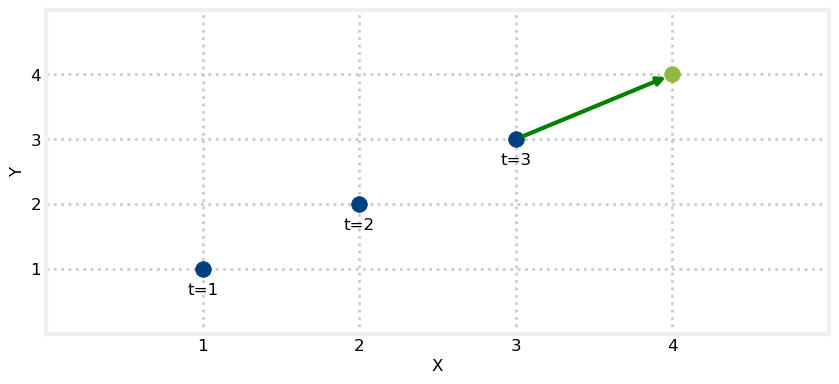

In [43]:
mkf_internal.show_position_prediction_chart()

You made this inference because you *inferred* a constant velocity for the airplane. The reasonable
assumption is that the aircraft is moving one unit each in *x* and *y* per time step.

你做了这个推断，是因为你*推断*飞机的速度是恒定的。假设飞机每个时间步长以* x *和* y *为单位移动一个单位是合理的。

Think back to the **g-h Filter** chapter when we were trying to improve the weight predictions of a noisy scale. We incorporated *weight gain* into the equations because it allowed us to make a better prediction of the weight the next day. The g-h filter uses the $g$ parameter to scale the amount of significance given to the current weight measurement, and the $h$ parameter scaled the amount of significance given to the weight gain.

请回想一下在**g-h滤波器**一章中，当我们尝试改进重量预测的噪声时，我们将*体重增益*纳入方程式，因为它使我们能够在第二天更好地预测体重。g-h过滤器使用参数$ g $来缩放当前体重测量值的显著性，而参数$ h $来缩放当前体重增加的显著性。

We are going to do the same thing with our Kalman filter. After all, the Kalman filter is a form of a g-h filter. In this case we are tracking an airplane, so instead of weight and weight gain we need to track position and velocity. Weight gain is the *derivative* of weight, and of course velocity is the derivative of position. It's impossible to plot and understand the 4D chart that would be needed to plot *x* and *y* and their respective velocities so let's do it for $x$, knowing that the math generalizes to more dimensions.

我们使用卡尔曼滤波器做同样的事情。毕竟，卡尔曼滤波器是g-h滤波器的一种特殊形式。在这种情况下，我们在跟踪飞机，因此我们需要跟踪位置和速度，而不是重量和重量增量。 体重增量是体重的*导数*，同样速度是位置的导数。在4维图表中绘制和理解*x*和*y*以及其各自的速度是不可能的，所以让我们用$ x $来做，从而在数学上推广到更多维度。

At time 1 we might be fairly certain about the position (x=0) but have no idea about the velocity. We can plot that with a covariance matrix like this. The narrow width expresses our relative certainty about position, and the tall height expresses our lack of knowledge about velocity.

在时间1，我们可能相当确定位置（x = 0）但不知道速度。 我们可以用这样的协方差矩阵来绘制它。 狭窄的宽度表达了我们对位置的相对确定性，很高的长度表示我们对速度的了解不足。

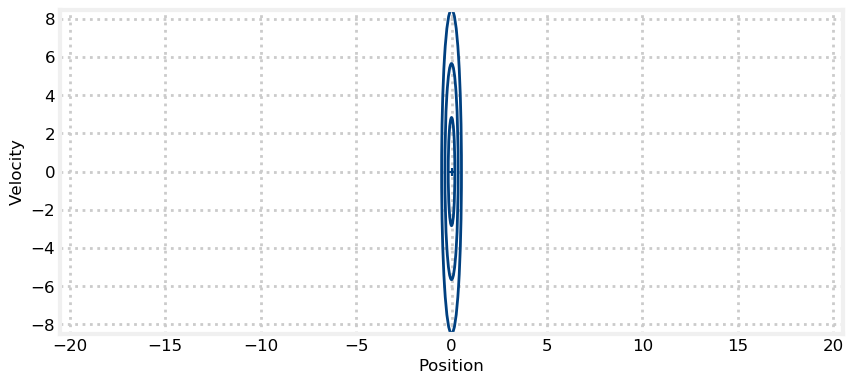

In [44]:
mkf_internal.show_x_error_chart(1)

Now after one second we get a position update of x=5.

现在一秒钟之后我们得到x = 5的位置更新。

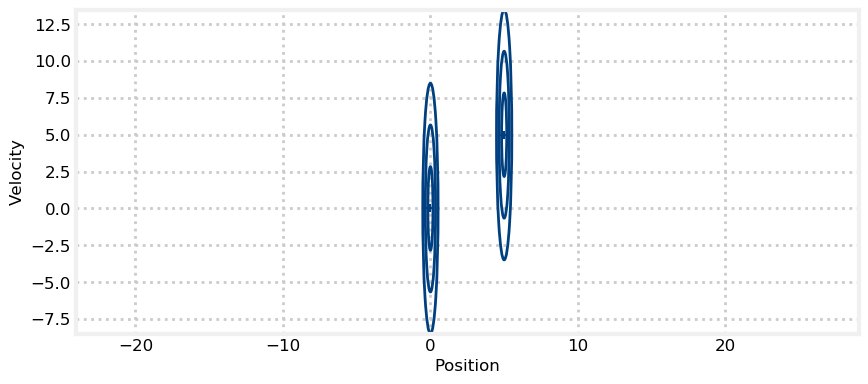

In [45]:
mkf_internal.show_x_error_chart(2)

This implies that our velocity is roughly 5 m/s. But of course position and velocity are correlated. If the velocity is 5 m/s the position would be 5, but if the velocity was 10 m/s the position would be 10. So let's draw a covariance matrix in red showing the relationship between the position and velocity.

这意味着我们的速度大约为5米/秒。 但是，位置和速度是相关的。 如果速度为5米/秒，则位置为5，但如果速度为10米/秒，则位置为10.因此，让我们绘制一个红色的协方差矩阵，显示位置和速度之间的关系。

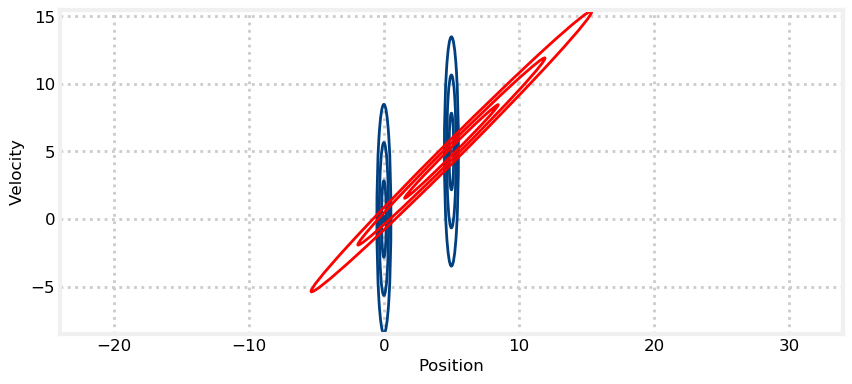

In [46]:
mkf_internal.show_x_error_chart(3)

It won't be clear until the next chapter how I calculate this covariance. Ignore the calculation, and think about what this implies. We have no easy way to say where the object really is because we are so uncertain about the velocity. Hence the ellipse stretches very far in the x-axis. Our uncertainty in velocity of course means it is also very spread in the y-axis. But as I said in the last paragraph, position is correlated to velocity. If the velocity is 5 m/s the next position would be 5, and if the velocity is 10 the next position would be 10. They are very correlated, so the ellipse must be very narrow. 

到下一章我们将学习如何计算这种协方差。现在先忽略计算，并考虑它的意义。我们没有简单的方法来确定该对象的真正位置，因为我们对速度非常不确定。 因此，椭圆在x轴上伸展很远。我们在速度上的不确定性意味着它在y轴上也非常分散。 但正如我在上一段中所说，位置与速度是相关的。如果速度为5米/秒，则下一个位置为5，如果速度为10，则下一个位置为10.它们非常相关，因此椭圆非常的窄。

This superposition of the two covariances is where the magic happens. The only reasonable estimate at time t=1 (where position=5) is roughly the intersection between the two covariance matrices! More exactly, we can use the math from the last section and multiply the two covariances together. From a Bayesian point of view we multiply the prior with the probability of the evidence (the *likelihood*) to get the posterior. If we multiply the position covariance with the velocity covariance using the Bayesian equations we get this result:

而这两个协方差的叠加的地方就会出现奇迹。在时间t = 1时（其中位置= 5），位置的唯一合理估计大致是两个协方差矩阵之间的交集！ 更准确地说，我们可以使用上一节中的数学方法，将两个协方差相乘。从贝叶斯的观点来看，我们将先验与证据的概率（*似然*）相乘得到后验。如果我们使用贝叶斯方程将位置协方差与速度协方差相乘，我们将得到这个结果：

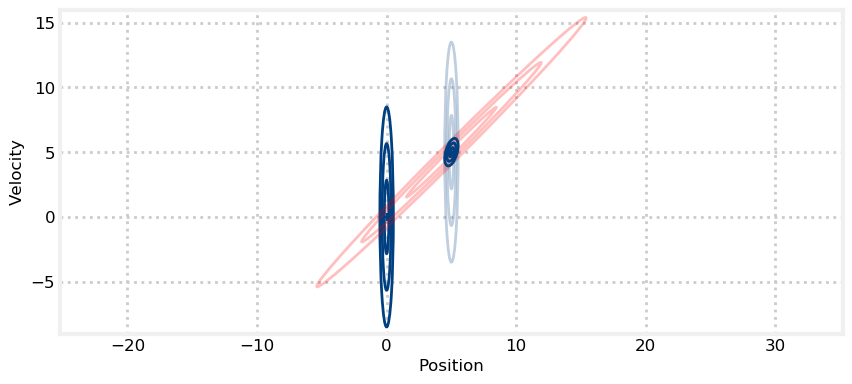

In [47]:
mkf_internal.show_x_error_chart(4)

The new covariance (the posterior) lies at the intersection of the position covariance and the velocity covariance. It is slightly tilted, showing that there is some correlation between the position and velocity. Far more importantly, it is much smaller than either the position or velocity covariances. In the previous chapter our variance would get smaller each time we performed an `update()` because the previous estimate was multiplied by the new measurement. The same happens here. However, here the improvement is markedly better. This is because we are using two different pieces of information which are nevertheless correlated. Knowing the velocity approximately and their correlation and the position approximately allows us to make a very accurate estimate.

新的协方差（后验）位于位置协方差和速度协方差的交叉点。 它稍微倾斜，表明位置和速度之间存在某种相关性。 更重要的是，它比位置或速度协方差小得多。 在前一章中，每次执行`update()`时，我们的方差都会变小，因为先前的估计值乘以了新的测量值。 这里也是如此。 但是，这里明显改进的更好。这是因为我们正在使用两个不同的信息，这些信息仍然是相关的。 现在我们知道速度的近似值及其相关性和位置的近似值使我们能够做出非常准确的估计。

This is a key point, so read carefully! The radar is only detecting the position of the aircraft. This is called an *observed variable*. Based on the position estimates we can compute velocity. We call the velocity a *hidden variable*. Hidden means what it sounds like - there is no sensor that is measuring velocity, thus its value is hidden from us. We are able to use the correlation between position and velocity to infer its value very accurately.

这是关键点，所以请仔细阅读！雷达只检测了飞机的位置。 这被称为*观察变量*。根据位置估计，我们可以计算出速度。我们将速度称为*隐藏变量*。 隐藏意味着没有传感器在测量速度，因此它的测量值对我们来说是隐藏的。我们能够使用位置和速度之间的相关性来非常准确地推断其值。

To round out the terminology there are also *unobserved variables*. For example, the aircraft's state includes things such as as heading, engine RPM, weight, color, the first name of the pilot, and so on. We cannot sense these directly using the position sensor so they are not *observed*. There is no way to *infer* them from the sensor measurements and correlations (red planes don't go faster than white planes), so they are not *hidden*. Instead, they are *unobservable*. If you include an unobserved variable in your filter state the estimate for that variable will be nonsense.

完善的术语表示中还有的*未观察到的变量*。 例如，飞机的状态包括诸如航向，发动机转速，重量，颜色，飞行员的名字等等。 我们无法使用位置传感器直接感知这些，因此这些变量不会被*观察*。 但是没有办法从传感器测量和相关性来*推断*它们（红色飞机不会比白色飞机快），所以它们不是*隐藏*。 相反，它们是*不可观察的*。如果在滤波器状态中包含未观察到的变量，那么对这些变量的估计将是无意义的。

What makes this possible? Imagine for a moment that we superimposed the velocity from a different airplane over the position graph. Clearly the two are not related, and there is no way that combining the two could possibly yield any additional information. In contrast, the velocity of this airplane tells us something very important - the direction and speed of travel. So long as the aircraft does not alter its velocity the velocity allows us to predict where the next position is. After a relatively small amount of error in velocity the probability that it is a good match with the position is very small. Think about it - if you suddenly change direction your position is also going to change a lot. If the measurement of the position is not in the direction of the velocity change it is very unlikely to be true. The two are correlated, so if the velocity changes so must the position, and in a predictable way. 

是什么让这成为可能？ 想象一下，如果我们将来自另一架飞机的速度叠加在位置图上。 显然，这两者并不相关，并且没有办法将两者结合起来产生任何可能的额外信息。 相比之下，这架飞机的速度告诉我们一些非常重要的东西——飞行的方向和速度。 只要飞机不改变其速度，速度的值就可以让我们预测下一个位置。在相对较小的速度误差后，与位置匹配的概率很小。 想一想 - 如果你突然改变方向，你的位置也会发生很大变化。 如果位置的测量不在速度变化的方向上，则不太可能是真的。 这两者是相关的，所以如果速度发生变化，那么必然可以预测位置发生了改变。

It is important to understand that we are taking advantage of the fact that velocity and position are correlated. We get a rough estimate of velocity from the distance and time between two measurements, and use Bayes theorem to produce very accurate estimates after only a few observations. Please reread this section if you have any doubts. If you do not understand this you will quickly find it impossible to reason about what you will learn in the following chapters.

重要的是要理解我们正在利用速度和位置相关的事实。 我们从两次测量之间的距离和时间粗略估计了速度，并使用贝叶斯定理在几次观察后产生非常准确的估计。如果您有任何疑问，请仔细阅读本节。如果您不理解这一点，您很快就会发现无法在下面的章节中理解您将学到什么。

## Higher Dimensions
## 更高维度

So far I have shown you two dimensional Gaussians, but the math does not limit you to two dimensions. In later chapters we will be working in 9, or even 12 dimensions. If you work in areas such as weather prediction, you can end up with thousands of dimensions.

到目前为止，我已向您展示了二维高斯，但数学方法并不会把你限制在两个维度。在后面的章节中，我们将在9个甚至12个维度中工作。 如果您从事天气预报等领域工作，你最终可能会有数千个维度。

What do these higher dimensions 'look like? Well, a two dimensional Gaussian can be represented by an error ellipse, so it stands to reason a three dimensional Gaussian could be represented by a 3D error ellipsoid. We won't delve into the math here, but this turns out to be true. `FilterPy` provides a function to plot this ellipse.

这些更高的维度的形状是什么样的呢？二维高斯可以用误差椭圆表示，因此不难理解三维高斯可以用3D误差椭球来表示。我们不会在这里深入研究数学，但事实证明这是真的。 `FilterPy`提供了绘制椭圆的函数。

First, let's make some noisy data with a given covariance, just so we can plot it inside the ellipsoid.

首先，让我们用一个给定的协方差来制作一些噪声数据，这样我们就可以在椭圆球内绘制它。

In [48]:
from filterpy.stats import plot_3d_covariance

mu = [0.3, 5., 10.]
C = np.array([[1.0, .03, .2],
              [.03,  4.0, .0],
              [.2,  .0, 16.1]])

sample = np.random.multivariate_normal(mu, C, size=1000)

Now we plot the ellipsoid with the `FilterPy` function `plot_3d_covariance`, and then scatter plot the samples.

现在我们使用`FilterPy`函数`plot_3d_covariance`绘制椭圆球，然后画出散点图样本。

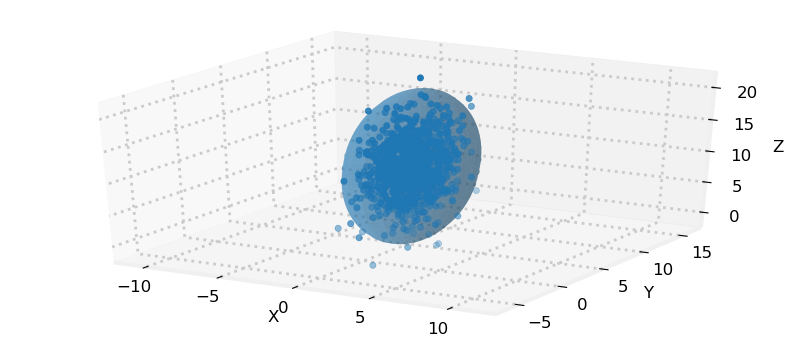

In [49]:
ax = plot_3d_covariance(mu, C, alpha=.4, std=3, limit_xyz=True)
ax.scatter(sample[:, 0], sample[:, 1], zs=sample[:, 2],);

Theory states that roughly 99% of a distribution will fall withing 3 standard deviations, and this appears to be the case.

理论表明，大约99％的分布将落在3个标准偏差之内，上图这似乎就是这种情况。

Nine dimensions? I haven't quite figured out how to plot a 9D ellipsoid on a 2D screen, so there will be no graphs. The concept is the same; the standard deviation error of the distribution can be described by a 9D ellipsoid.

那九维呢？ 我还没弄清楚如何在2D屏幕上绘制9D椭圆体，因此没有图形。概念是一样的; 分布的标准偏差误差可以用9D椭圆球来表示。

## Summary
## 总结

We have taken advantage of the geometry and correlations of the system to produce a very accurate estimate. The math does not care whether we are working with two positions, or a position and a correlated velocity, or if these are spatial dimensions. If floor space is correlated to house price you can write a Kalman filter to track house prices. If age is correlated to disease incidence you can write a Kalman filter to track diseases. If the zombie population is inversely correlated with the number of shotguns then you can write a Kalman filter to track zombie populations. I showed you this in terms of geometry and talked about *triangulation*. That was just to build your intuition. You can write a Kalman filter for state variables that have no geometric representation, such as filters for stock prices or milk production of cows (I received an email from someone tracking milk production!) Get used to thinking of these as Gaussians with correlations. If we can express our uncertainties as a multidimensional Gaussian we can then multiply the prior with the likelihood and get a much more accurate result. 

我们利用系统的几何性质和相关性来产生非常准确的估计。数学上并不关心我们是使用两个位置，还是位置和相关的速度，或者是空间维度。如果占地面积与房价相关，您可以编写卡尔曼滤波器来跟踪房价。如果年龄与疾病发病率相关，您可以编写卡尔曼滤波器来跟踪疾病。如果僵尸群体与霰弹枪的数量成反比关系，那么你可以编写一个卡尔曼滤波器来跟踪僵尸群体。我用几何学的方式向你展示了这个，并谈到了*三角测量*。那只是为了建立你的直觉。您可以为没有几何表示的状态变量编写卡尔曼滤波器，例如股票价格的滤波器或奶牛的产奶量（我收到了有个跟踪牛奶产量人的电子邮件！）习惯将这些变量视为具有相关性的高斯分布。如果我们可以将我们的不确定性表示为多维高斯，那么我们可以将先验与似然值相乘，得到更准确的结果。

## References

- [1] http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

- [2] `FilterPy` library. Roger Labbe.
https://github.com/rlabbe/filterpy